In [ ]:
#  DEMO script (python version) for DRR
#  
#  Copyright (C) 2022 Yangkang Chen
#  
#  This program is free software: you can redistribute it and/or modify
#  it under the terms of the GNU General Public License as published
#  by the Free Software Foundation, either version 3 of the License, or
#  any later version.
#
#  This program is distributed in the hope that it will be useful,
#  but WITHOUT ANY WARRANTY; without even the implied warranty of
#  MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
#  GNU General Public License for more details: http://www.gnu.org/licenses/
#  
#   Reference:  Huang, W., Wang, R., Chen, Y., Li, H., & Gan, S. (2016). Damped multichannel singular spectrum analysis for 3D random noise attenuation. Geophysics, 81(4), V261-V270.
#               Chen, Y., Huang, W., Zhang, D., & Chen, W. (2016). An open-source Matlab code package for improved rank-reduction 3D seismic data denoising and reconstruction. Computers & Geosciences, 95, 59-66.
#               Chen, Y., Zhang, D., Jin, Z., Chen, X., Zu, S., Huang, W., & Gan, S. (2016). Simultaneous denoising and reconstruction of 5-D seismic data via damped rank-reduction method. Geophysical Journal International, 206(3), 1695-1717.
#               Chen, Y., Huang, W., Yang, L., Oboue, Y.A.S.I., Saad, O.M., and Chen Y.F. 2023, DRR: An open-source multi-platform package for the damped rank-reduction method and its applications in seismology. Computers & Geosciences, 180, 105440.

## Generate synthetic data
 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import src as pd #pd: DRR

## generate the synthetic data
a1=np.zeros([300,80])
[n,m]=a1.shape
a3=a1.copy();
a4=a1.copy();

k=-1;
a=0.1;
b=1;
pi=np.pi

ts=np.arange(-0.055,0.055+0.002,0.002)
b1=np.zeros([len(ts)])
b2=np.zeros([len(ts)])
b3=np.zeros([len(ts)])
b4=np.zeros([len(ts)])

for t in ts:
    k=k+1;
    b1[k]=(1-2*(pi*30*t)*(pi*30*t))*np.exp(-(pi*30*t)*(pi*30*t));
    b2[k]=(1-2*(pi*40*t)*(pi*40*t))*np.exp(-(pi*40*t)*(pi*40*t));
    b3[k]=(1-2*(pi*40*t)*(pi*40*t))*np.exp(-(pi*40*t)*(pi*40*t));
    b4[k]=(1-2*(pi*30*t)*(pi*30*t))*np.exp(-(pi*30*t)*(pi*30*t));

t1=np.zeros([m],dtype='int')
t3=np.zeros([m],dtype='int')
t4=np.zeros([m],dtype='int')
for i in range(m):
  t1[i]=np.round(140);
  t3[i]=np.round(-2*i+220);
  t4[i]=np.round(2*i+10);
  a1[t1[i]:t1[i]+k+1,i]=b1; 
  a3[t3[i]:t3[i]+k+1,i]=b1; 
  a4[t4[i]:t4[i]+k+1,i]=b1; 

d0=a1[0:300,:]+a3[0:300,:]+a4[0:300,:];

## add noise
[n1,n2]=d0.shape
np.random.seed(201415)
n=0.1*np.random.randn(n1,n2);
dn=d0+n;
print(np.std(dn))




0.24484765391958788


## Applying DRR

flow= 0 fhigh= 120 dt= 0.004 N= 3 K= 100 verb= 0
flow= 0 fhigh= 120 dt= 0.004 N= 3 K= 3 verb= 0
SNR of RR is 15.316
SNR of DRR is 19.9643


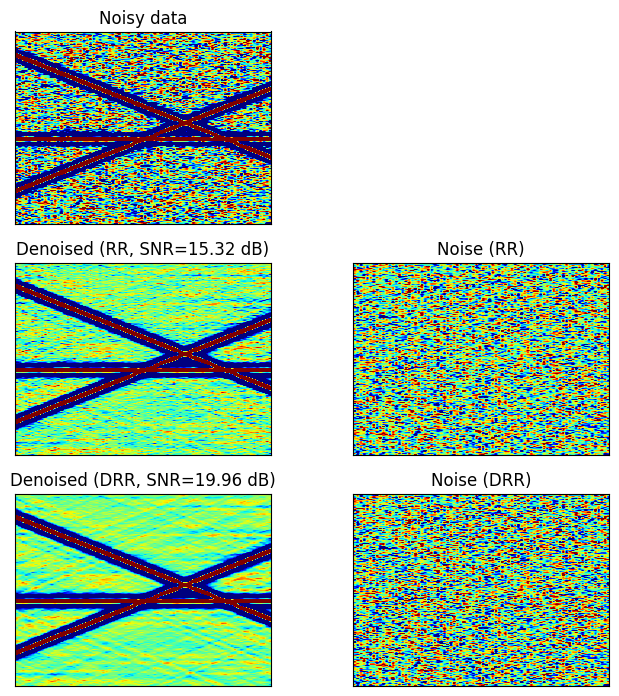

In [3]:
## Comparison between RR and DRR
d1=pd.drr3d(dn,0,120,0.004,3,100);	#RR 
noi1=dn-d1;

d2=pd.drr3d(dn,0,120,0.004,3,3);	#DRR
noi2=dn-d2;

print('SNR of RR is %g'%pd.snr(d0,d1));
print('SNR of DRR is %g'%pd.snr(d0,d2));

## plot results
fig = plt.figure(figsize=(8, 8.5))
ax = fig.add_subplot(3,2,1)
plt.imshow(dn,cmap='jet',clim=(-0.1, 0.1),aspect=0.2);ax.set_xticks([]);ax.set_yticks([]);
plt.title('Noisy data');
ax = fig.add_subplot(3,2,3)
plt.imshow(d1,cmap='jet',clim=(-0.1, 0.1),aspect=0.2);ax.set_xticks([]);ax.set_yticks([]);
plt.title('Denoised (RR, SNR=%.4g dB)'%pd.snr(d0,d1));
ax = fig.add_subplot(3,2,4)
plt.imshow(noi1,cmap='jet',clim=(-0.1, 0.1),aspect=0.2);ax.set_xticks([]);ax.set_yticks([]);
plt.title('Noise (RR)');
ax = fig.add_subplot(3,2,5)
plt.imshow(d2,cmap='jet',clim=(-0.1, 0.1),aspect=0.2);ax.set_xticks([]);ax.set_yticks([]);
plt.title('Denoised (DRR, SNR=%.4g dB)'%pd.snr(d0,d2));
ax = fig.add_subplot(3,2,6)
plt.imshow(noi2,cmap='jet',clim=(-0.1, 0.1),aspect=0.2);ax.set_xticks([]);ax.set_yticks([]);
plt.title('Noise (DRR)');
plt.savefig('test_pydrr_drr2d.png',format='png',dpi=300);
plt.show()